In [71]:
import pandas as pd
import numpy as np
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
 
dataset = pd.read_csv('maize2.csv')

#df_new['Rainfall'].value_counts()
dataset=dataset.drop(['Production'],axis=1)

dataset['fertilizer'] = (dataset['NPK']+dataset['TSP']+dataset['MOP'])/3

dataset=dataset.drop(['DAP'],axis=1)
dataset=dataset.drop(['MAP'],axis=1)
dataset=dataset.drop(['MOP'],axis=1)
dataset=dataset.drop(['NPK'],axis=1)
dataset=dataset.drop(['UREA'],axis=1)
dataset=dataset.drop(['TSP'],axis=1)
dataset

,Area,Labour_hours,Rainfall,Yield,fertilizer
0,7000,480.0,649,2000.000000,0.82
1,6000,480.0,649,2333.333333,0.82
2,5000,480.0,649,2400.000000,0.82
3,5000,480.0,649,2200.000000,0.82
4,5000,480.0,649,2400.000000,0.82
...,...,...,...,...,...
3778,188466,1040.0,494,795.146074,0.78
3779,193466,1040.0,494,1841.196903,0.78
3780,173614,1040.0,494,1375.528471,0.78
3781,179262,1040.0,494,939.228615,0.78


In [72]:
dataset['Labour_hours'].value_counts()

467.2     2549
1004.2     456
1040.0     411
480.0      367
Name: Labour_hours, dtype: int64

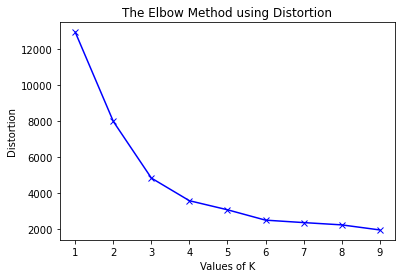

In [73]:
X=dataset.values
from sklearn.cluster import KMeans 
from sklearn import metrics 
from scipy.spatial.distance import cdist 
import numpy as np 
import matplotlib.pyplot as plt 

distortions = [] 
inertias = [] 
mapping1 = {} 
mapping2 = {} 
K = range(1,10) 
  
for k in K: 
    #Building and fitting the model 
    kmeanModel = KMeans(n_clusters=k).fit(X) 
    kmeanModel.fit(X)     
      
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 
                      'euclidean'),axis=1)) / X.shape[0]) 
    inertias.append(kmeanModel.inertia_) 
  
    mapping1[k] = sum(np.min(cdist(X, kmeanModel.cluster_centers_, 
                 'euclidean'),axis=1)) / X.shape[0] 
    mapping2[k] = kmeanModel.inertia_ 
    
plt.plot(K, distortions, 'bx-') 
plt.xlabel('Values of K') 
plt.ylabel('Distortion') 
plt.title('The Elbow Method using Distortion') 
plt.show() 

[[-0.09725773 -0.49667884  0.3535814  -0.05184707  0.55343618]
 [-0.13926383 -0.49667884  0.3535814   0.1647666   0.55343618]
 [-0.18126994 -0.49667884  0.3535814   0.20808934  0.55343618]
 ...
 [ 6.90154708  1.91349367 -0.44194826 -0.45765428  0.11361704]
 [ 7.13879755  1.91349367 -0.44194826 -0.74117982  0.11361704]
 [ 7.14375427  1.91349367 -0.44194826 -0.46228879  0.11361704]]


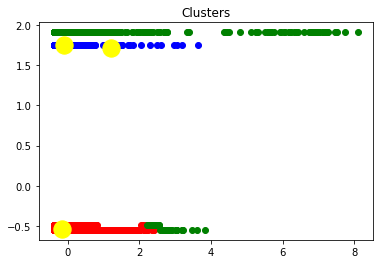

In [74]:


#scaler = StandardScaler() 
  
# To scale data 
#scaler.fit(dataset)

#X = preprocessing.scale(dataset)

#print(dataset)

#min_max_scaler = preprocessing.MinMaxScaler()
#X = min_max_scaler.fit_transform(dataset)

scalerX = StandardScaler().fit(dataset)

X = scalerX.transform(dataset)


#X=X_scaled.values
#X=dataset.values
print(X)

#X_old = scalerX.inverse_transform(X)

#print(X_old)

# Applying k-means to the sample dataset
#k-means++’ : selects initial cluster centers for k-mean clustering in a smart way to speed up convergence. 
#Number of time the k-means algorithm will be run with different centroid seeds. The final results will be the best output of n_init consecutive runs in terms of inertia.
#Determines random number generation for centroid initialization.
kmeans = KMeans(n_clusters=3,init='k-means++',max_iter=300,n_init=10,random_state=0) 
#Compute cluster centers and predict cluster index for each sample.
y_kmeans = kmeans.fit_predict(X)
dataset['Cluster'] = pd.Series(y_kmeans, index=dataset.index)

# Visualising the clusters
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0,1],c='red',label='A')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1,1],c='blue',label='B')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2,1],c='green',label='C')
#plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3,1],c='pink',label='D')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=300,c='yellow',label='Centroids')
plt.title('Clusters')

plt.show()

In [75]:
dataset
dataset['Cluster'].value_counts()

0    2879
1     456
2     448
Name: Cluster, dtype: int64

In [76]:
grouped = dataset.groupby(dataset.Cluster)

cluster0 = grouped.get_group(0)
cluster1 = grouped.get_group(1)
cluster2 = grouped.get_group(2)
#cluster3 = grouped.get_group(3)



In [77]:
cluster0=cluster0.drop(['Cluster'],axis=1)
cluster1=cluster1.drop(['Cluster'],axis=1)
cluster2=cluster2.drop(['Cluster'],axis=1)
#cluster3=cluster3.drop(['Cluster'],axis=1)

In [78]:
print(cluster0.max()) 
print(cluster0.min())

print(cluster1.max()) 
print(cluster1.min())

print(cluster2.max()) 
print(cluster2.min())

#

Area            66628.00
Labour_hours      480.00
Rainfall          649.00
Yield            7000.00
fertilizer          0.82
dtype: float64
Area              1.00
Labour_hours    467.20
Rainfall        494.00
Yield             0.00
fertilizer        0.64
dtype: float64
Area            95547.00000
Labour_hours     1004.20000
Rainfall         1094.00000
Yield           11292.99602
fertilizer          1.00000
dtype: float64
Area               1.000000
Labour_hours    1004.200000
Rainfall        1094.000000
Yield             26.054591
fertilizer         1.000000
dtype: float64
Area            202328.000000
Labour_hours      1040.000000
Rainfall           649.000000
Yield             3582.089552
fertilizer           0.820000
dtype: float64
Area              1.000000
Labour_hours    467.200000
Rainfall        494.000000
Yield            60.412769
fertilizer        0.730000
dtype: float64


In [79]:
bin_area = [-1,300,2500,220000]
bin_labour = [-1,470,500,1100]
bin_rainfall = [400,500,700,1100]
bin_yield= [-1,1300,1800,11500]
bin_fertilizer=[0,0.65,0.75,1]

In [90]:
category = pd.cut(cluster0.Area,bin_area)
category = category.to_frame()
category.columns = ['range_area']
#concatenate age and its bin
df_new = pd.concat([cluster0,category],axis = 1)
df_new
category = pd.cut(cluster0.Labour_hours,bin_labour)
category = category.to_frame()
category.columns = ['range_labour']
#concatenate age and its bin
df_new = pd.concat([df_new,category],axis = 1)
df_new
category = pd.cut(cluster0.Rainfall,bin_rainfall)
category = category.to_frame()
category.columns = ['range_rainfall']
#concatenate age and its bin
df_new = pd.concat([df_new,category],axis = 1)
df_new

category = pd.cut(cluster0.Yield,bin_yield)
category = category.to_frame()
category.columns = ['range_yield']
#concatenate age and its bin
df_new = pd.concat([df_new,category],axis = 1)
df_new

category = pd.cut(cluster0.fertilizer,bin_fertilizer)
category = category.to_frame()
category.columns = ['range_fertilizer']
#concatenate age and its bin
df_new = pd.concat([df_new,category],axis = 1)
df_new


df_new=df_new.drop(['Area'],axis=1)
df_new=df_new.drop(['Labour_hours'],axis=1)
df_new=df_new.drop(['Rainfall'],axis=1)
df_new=df_new.drop(['Yield'],axis=1)
df_new=df_new.drop(['fertilizer'],axis=1)
# df_new=df_new.drop(['DAP'],axis=1)
# df_new=df_new.drop(['MAP'],axis=1)
# df_new=df_new.drop(['MOP'],axis=1)
# df_new=df_new.drop(['NPK'],axis=1)
# df_new=df_new.drop(['UREA'],axis=1)
# df_new=df_new.drop(['TSP'],axis=1)

print(df_new['range_area'].value_counts())
print(df_new['range_yield'].value_counts())

import numpy as np 
import pandas as pd 
from mlxtend.frequent_patterns import apriori, association_rules 


dummies1=pd.get_dummies(df_new.range_area)
dummies2=pd.get_dummies(df_new.range_labour)
dummies3=pd.get_dummies(df_new.range_rainfall)
dummies4=pd.get_dummies(df_new.range_yield)
dummies5=pd.get_dummies(df_new.range_fertilizer)

# dummies5=pd.get_dummies(df_new.range_dap)
# dummies6=pd.get_dummies(df_new.range_map)
# dummies7=pd.get_dummies(df_new.range_mop)
# dummies8=pd.get_dummies(df_new.range_npk)
# dummies9=pd.get_dummies(df_new.range_urea)
# dummies10=pd.get_dummies(df_new.range_tsp)


#merged=pd.concat([df_new,dummies1,dummies2,dummies3,dummies4,dummies5,dummies6,dummies7,dummies8,dummies9,dummies10],axis='columns')
merged=pd.concat([df_new,dummies1,dummies2,dummies3,dummies4,dummies5],axis='columns')
merged



#merged = merged.rename(columns={'(-1, 59963]': '(-1, 59963]_A','(59963, 153521]':'(59963, 153521]_A'})

merged=merged.drop(['range_area'],axis=1)
merged=merged.drop(['range_labour'],axis=1)
merged=merged.drop(['range_rainfall'],axis=1)
merged=merged.drop(['range_yield'],axis=1)
merged=merged.drop(['range_fertilizer'],axis=1)

# merged=merged.drop(['range_dap'],axis=1)
# merged=merged.drop(['range_map'],axis=1)
# merged=merged.drop(['range_mop'],axis=1)
# merged=merged.drop(['range_npk'],axis=1)
# merged=merged.drop(['range_urea'],axis=1)
# merged=merged.drop(['range_tsp'],axis=1)



#merged.columns=['(-1, 59963]_a','(59963, 153521]_a','(153521, 410000]_a','(-1, 419]_','(419, 600]_l','(600, 1000]_l','(-1, 494]_r','(494, 800]_r','(800, 1200]_r','(-1, 2000]_y','(2000, 3000]_y','(3000, 11000]_y','(0.0, 0.3]_dap','(0.3, 0.6]_dap','(0.6, 1.0]_dap','(0.0, 0.3]_map','(0.3, 0.6]_map','(0.6, 1.0]_map','(0.0, 0.3]_mop','(0.3, 0.6]_mop','(0.6, 1.0]_mop','(0.0, 0.3]_npk','(0.3, 0.6]_npk','(0.6, 1.0]_npk','(0.0, 0.3]_urea','(0.3, 0.6]_urea','(0.6, 1.0]_urea','(0.0, 0.3]_tsp','(0.3, 0.6]_tsp','(0.6, 1.0]_tsp']
merged.columns=['(-1, 300]_a','(300, 2500]_a','(2500, 220000]_a','(-1, 470]_l','(470, 500]_l','(500, 1100]_l','(400, 500]_r','(500, 700]_r','(700, 1100]_r','(-1, 1300]_y','(1300, 1800]_y','(1800, 11500]_y','(0.0, 0.65]_fert','(0.65, 0.75]_fert','(0.75, 1.0]_fert']

merged


frq_items = apriori(merged, min_support = 0.3, use_colnames = True) 
  
# Collecting the inferred rules in a dataframe 
rules = association_rules(frq_items, metric ="lift", min_threshold = 1) 
rules = rules.sort_values(['confidence', 'lift'], ascending =[False, False]) 
#print(rules.head()) 


rules.to_csv('maize_rules1.csv')
rules

(-1, 300]         1310
(2500, 220000]     820
(300, 2500]        749
Name: range_area, dtype: int64
(1300, 1800]     1145
(1800, 11500]    1022
(-1, 1300]        712
Name: range_yield, dtype: int64


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
6,"((-1, 470]_l)","((400, 500]_r)",0.877041,0.877041,0.877041,1.000000,1.140198,0.107840,inf
7,"((400, 500]_r)","((-1, 470]_l)",0.877041,0.877041,0.877041,1.000000,1.140198,0.107840,inf
10,"((-1, 470]_l)","((0.65, 0.75]_fert)",0.877041,0.877041,0.877041,1.000000,1.140198,0.107840,inf
11,"((0.65, 0.75]_fert)","((-1, 470]_l)",0.877041,0.877041,0.877041,1.000000,1.140198,0.107840,inf
14,"((400, 500]_r)","((0.65, 0.75]_fert)",0.877041,0.877041,0.877041,1.000000,1.140198,0.107840,inf
...,...,...,...,...,...,...,...,...,...
17,"((0.65, 0.75]_fert)","((1300, 1800]_y)",0.877041,0.397708,0.394581,0.449901,1.131236,0.045776,1.09488
36,"((-1, 470]_l, (400, 500]_r)","((1300, 1800]_y)",0.877041,0.397708,0.394581,0.449901,1.131236,0.045776,1.09488
49,"((-1, 470]_l, (0.65, 0.75]_fert)","((1300, 1800]_y)",0.877041,0.397708,0.394581,0.449901,1.131236,0.045776,1.09488
55,"((400, 500]_r, (0.65, 0.75]_fert)","((1300, 1800]_y)",0.877041,0.397708,0.394581,0.449901,1.131236,0.045776,1.09488


In [85]:
cluster1

,Area,Labour_hours,Rainfall,Yield,fertilizer
219,2800,1004.2,1094,1750.000000,1.0
220,600,1004.2,1094,4000.000000,1.0
221,3300,1004.2,1094,2030.303030,1.0
222,300,1004.2,1094,5333.333333,1.0
223,3358,1004.2,1094,2840.976772,1.0
...,...,...,...,...,...
670,49482,1004.2,1094,6087.001334,1.0
671,3156,1004.2,1094,4007.921420,1.0
672,50712,1004.2,1094,7278.001262,1.0
673,2637,1004.2,1094,5857.034509,1.0


In [95]:
category = pd.cut(cluster1.Area,bin_area)
category = category.to_frame()
category.columns = ['range_area']
#concatenate age and its bin
df_new = pd.concat([cluster1,category],axis = 1)
df_new
category = pd.cut(cluster1.Labour_hours,bin_labour)
category = category.to_frame()
category.columns = ['range_labour']
#concatenate age and its bin
df_new = pd.concat([df_new,category],axis = 1)
df_new
category = pd.cut(cluster1.Rainfall,bin_rainfall)
category = category.to_frame()
category.columns = ['range_rainfall']
#concatenate age and its bin
df_new = pd.concat([df_new,category],axis = 1)
df_new

category = pd.cut(cluster1.Yield,bin_yield)
category = category.to_frame()
category.columns = ['range_yield']
#concatenate age and its bin
df_new = pd.concat([df_new,category],axis = 1)
df_new

category = pd.cut(cluster1.fertilizer,bin_fertilizer)
category = category.to_frame()
category.columns = ['range_fertilizer']
#concatenate age and its bin
df_new = pd.concat([df_new,category],axis = 1)
df_new


df_new=df_new.drop(['Area'],axis=1)
df_new=df_new.drop(['Labour_hours'],axis=1)
df_new=df_new.drop(['Rainfall'],axis=1)
df_new=df_new.drop(['Yield'],axis=1)
df_new=df_new.drop(['fertilizer'],axis=1)
# df_new=df_new.drop(['DAP'],axis=1)
# df_new=df_new.drop(['MAP'],axis=1)
# df_new=df_new.drop(['MOP'],axis=1)
# df_new=df_new.drop(['NPK'],axis=1)
# df_new=df_new.drop(['UREA'],axis=1)
# df_new=df_new.drop(['TSP'],axis=1)

print(df_new['range_area'].value_counts())
print(df_new['range_yield'].value_counts())

import numpy as np 
import pandas as pd 
from mlxtend.frequent_patterns import apriori, association_rules 


dummies1=pd.get_dummies(df_new.range_area)
dummies2=pd.get_dummies(df_new.range_labour)
dummies3=pd.get_dummies(df_new.range_rainfall)
dummies4=pd.get_dummies(df_new.range_yield)
dummies5=pd.get_dummies(df_new.range_fertilizer)

# dummies5=pd.get_dummies(df_new.range_dap)
# dummies6=pd.get_dummies(df_new.range_map)
# dummies7=pd.get_dummies(df_new.range_mop)
# dummies8=pd.get_dummies(df_new.range_npk)
# dummies9=pd.get_dummies(df_new.range_urea)
# dummies10=pd.get_dummies(df_new.range_tsp)


#merged=pd.concat([df_new,dummies1,dummies2,dummies3,dummies4,dummies5,dummies6,dummies7,dummies8,dummies9,dummies10],axis='columns')
#merged=pd.concat([df_new,dummies1,dummies2,dummies3,dummies4,dummies5],axis='columns')

#merged.columns=['(-1, 300]_a','(300, 2500]_a','(2500, 220000]_a','(-1, 470]_l','(470, 500]_l','(500, 1100]_l','(400, 500]_r','(500, 700]_r','(700, 1100]_r','(-1, 1300]_y','(1300, 1800]_y','(1800, 11500]_y','(0.0, 0.65]_fert','(0.65, 0.75]_fert','(0.75, 1.0]_fert']
merged



#merged = merged.rename(columns={'(-1, 59963]': '(-1, 59963]_A','(59963, 153521]':'(59963, 153521]_A'})

# merged=merged.drop(['range_area'],axis=1)
# merged=merged.drop(['range_labour'],axis=1)
# merged=merged.drop(['range_rainfall'],axis=1)
# merged=merged.drop(['range_yield'],axis=1)
# merged=merged.drop(['range_fertilizer'],axis=1)

# merged=merged.drop(['range_dap'],axis=1)
# merged=merged.drop(['range_map'],axis=1)
# merged=merged.drop(['range_mop'],axis=1)
# merged=merged.drop(['range_npk'],axis=1)
# merged=merged.drop(['range_urea'],axis=1)
# merged=merged.drop(['range_tsp'],axis=1)



#merged.columns=['(-1, 59963]_a','(59963, 153521]_a','(153521, 410000]_a','(-1, 419]_','(419, 600]_l','(600, 1000]_l','(-1, 494]_r','(494, 800]_r','(800, 1200]_r','(-1, 2000]_y','(2000, 3000]_y','(3000, 11000]_y','(0.0, 0.3]_dap','(0.3, 0.6]_dap','(0.6, 1.0]_dap','(0.0, 0.3]_map','(0.3, 0.6]_map','(0.6, 1.0]_map','(0.0, 0.3]_mop','(0.3, 0.6]_mop','(0.6, 1.0]_mop','(0.0, 0.3]_npk','(0.3, 0.6]_npk','(0.6, 1.0]_npk','(0.0, 0.3]_urea','(0.3, 0.6]_urea','(0.6, 1.0]_urea','(0.0, 0.3]_tsp','(0.3, 0.6]_tsp','(0.6, 1.0]_tsp']
#merged.columns=['(-1, 100]_a','(100, 500]_a','(500, 25000]_a','(-1, 300]_l','(300, 500]_l','(500, 600]_l','(400, 500]_r','(500, 800]_r','(800, 1100]_r','(-1, 12000]_y','(12000, 30000]_y','(30000, 2250000]_y','(0.0, 0.6]_fert','(0.6, 0.8]_fert','(0.8, 1.0]_fert']
merged.columns=['(-1, 300]_a','(300, 2500]_a','(2500, 220000]_a','(-1, 470]_l','(470, 500]_l','(500, 1100]_l','(400, 500]_r','(500, 700]_r','(700, 1100]_r','(-1, 1300]_y','(1300, 1800]_y','(1800, 11500]_y','(0.0, 0.65]_fert','(0.65, 0.75]_fert','(0.75, 1.0]_fert']
print(merged)


frq_items = apriori(merged, min_support = 0.3, use_colnames = True) 
  
# Collecting the inferred rules in a dataframe 
rules = association_rules(frq_items, metric ="lift", min_threshold = 1) 
rules = rules.sort_values(['confidence', 'lift'], ascending =[False, False]) 
#print(rules.head()) 


rules.to_csv('maize_rules2.csv')
rules

(2500, 220000]    229
(300, 2500]       158
(-1, 300]          69
Name: range_area, dtype: int64
(1800, 11500]    409
(1300, 1800]      26
(-1, 1300]        21
Name: range_yield, dtype: int64
      (-1, 300]_a  (300, 2500]_a  (2500, 220000]_a  (-1, 470]_l  (470, 500]_l  \
0               0              0                 1            0             1   
1               0              0                 1            0             1   
2               0              0                 1            0             1   
3               0              0                 1            0             1   
4               0              0                 1            0             1   
...           ...            ...               ...          ...           ...   
3367            0              1                 0            0             1   
3368            0              1                 0            0             1   
3369            0              1                 0            0             1  

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
6,"((-1, 470]_l)","((400, 500]_r)",0.877041,0.877041,0.877041,1.000000,1.140198,0.107840,inf
7,"((400, 500]_r)","((-1, 470]_l)",0.877041,0.877041,0.877041,1.000000,1.140198,0.107840,inf
10,"((-1, 470]_l)","((0.65, 0.75]_fert)",0.877041,0.877041,0.877041,1.000000,1.140198,0.107840,inf
11,"((0.65, 0.75]_fert)","((-1, 470]_l)",0.877041,0.877041,0.877041,1.000000,1.140198,0.107840,inf
14,"((400, 500]_r)","((0.65, 0.75]_fert)",0.877041,0.877041,0.877041,1.000000,1.140198,0.107840,inf
...,...,...,...,...,...,...,...,...,...
17,"((0.65, 0.75]_fert)","((1300, 1800]_y)",0.877041,0.397708,0.394581,0.449901,1.131236,0.045776,1.09488
36,"((-1, 470]_l, (400, 500]_r)","((1300, 1800]_y)",0.877041,0.397708,0.394581,0.449901,1.131236,0.045776,1.09488
49,"((-1, 470]_l, (0.65, 0.75]_fert)","((1300, 1800]_y)",0.877041,0.397708,0.394581,0.449901,1.131236,0.045776,1.09488
55,"((400, 500]_r, (0.65, 0.75]_fert)","((1300, 1800]_y)",0.877041,0.397708,0.394581,0.449901,1.131236,0.045776,1.09488


In [96]:
category = pd.cut(cluster2.Area,bin_area)
category = category.to_frame()
category.columns = ['range_area']
#concatenate age and its bin
df_new = pd.concat([cluster2,category],axis = 1)
df_new
category = pd.cut(cluster2.Labour_hours,bin_labour)
category = category.to_frame()
category.columns = ['range_labour']
#concatenate age and its bin
df_new = pd.concat([df_new,category],axis = 1)
df_new
category = pd.cut(cluster2.Rainfall,bin_rainfall)
category = category.to_frame()
category.columns = ['range_rainfall']
#concatenate age and its bin
df_new = pd.concat([df_new,category],axis = 1)
df_new

category = pd.cut(cluster2.Yield,bin_yield)
category = category.to_frame()
category.columns = ['range_yield']
#concatenate age and its bin
df_new = pd.concat([df_new,category],axis = 1)
df_new

category = pd.cut(cluster2.fertilizer,bin_fertilizer)
category = category.to_frame()
category.columns = ['range_fertilizer']
#concatenate age and its bin
df_new = pd.concat([df_new,category],axis = 1)
df_new


df_new=df_new.drop(['Area'],axis=1)
df_new=df_new.drop(['Labour_hours'],axis=1)
df_new=df_new.drop(['Rainfall'],axis=1)
df_new=df_new.drop(['Yield'],axis=1)
df_new=df_new.drop(['fertilizer'],axis=1)
# df_new=df_new.drop(['DAP'],axis=1)
# df_new=df_new.drop(['MAP'],axis=1)
# df_new=df_new.drop(['MOP'],axis=1)
# df_new=df_new.drop(['NPK'],axis=1)
# df_new=df_new.drop(['UREA'],axis=1)
# df_new=df_new.drop(['TSP'],axis=1)

print(df_new['range_area'].value_counts())
print(df_new['range_yield'].value_counts())

import numpy as np 
import pandas as pd 
from mlxtend.frequent_patterns import apriori, association_rules 


dummies1=pd.get_dummies(df_new.range_area)
dummies2=pd.get_dummies(df_new.range_labour)
dummies3=pd.get_dummies(df_new.range_rainfall)
dummies4=pd.get_dummies(df_new.range_yield)
dummies5=pd.get_dummies(df_new.range_fertilizer)

# dummies5=pd.get_dummies(df_new.range_dap)
# dummies6=pd.get_dummies(df_new.range_map)
# dummies7=pd.get_dummies(df_new.range_mop)
# dummies8=pd.get_dummies(df_new.range_npk)
# dummies9=pd.get_dummies(df_new.range_urea)
# dummies10=pd.get_dummies(df_new.range_tsp)


#merged=pd.concat([df_new,dummies1,dummies2,dummies3,dummies4,dummies5,dummies6,dummies7,dummies8,dummies9,dummies10],axis='columns')
merged=pd.concat([df_new,dummies1,dummies2,dummies3,dummies4,dummies5],axis='columns')
merged



#merged = merged.rename(columns={'(-1, 59963]': '(-1, 59963]_A','(59963, 153521]':'(59963, 153521]_A'})

merged=merged.drop(['range_area'],axis=1)
merged=merged.drop(['range_labour'],axis=1)
merged=merged.drop(['range_rainfall'],axis=1)
merged=merged.drop(['range_yield'],axis=1)
merged=merged.drop(['range_fertilizer'],axis=1)

# merged=merged.drop(['range_dap'],axis=1)
# merged=merged.drop(['range_map'],axis=1)
# merged=merged.drop(['range_mop'],axis=1)
# merged=merged.drop(['range_npk'],axis=1)
# merged=merged.drop(['range_urea'],axis=1)
# merged=merged.drop(['range_tsp'],axis=1)



#merged.columns=['(-1, 59963]_a','(59963, 153521]_a','(153521, 410000]_a','(-1, 419]_','(419, 600]_l','(600, 1000]_l','(-1, 494]_r','(494, 800]_r','(800, 1200]_r','(-1, 2000]_y','(2000, 3000]_y','(3000, 11000]_y','(0.0, 0.3]_dap','(0.3, 0.6]_dap','(0.6, 1.0]_dap','(0.0, 0.3]_map','(0.3, 0.6]_map','(0.6, 1.0]_map','(0.0, 0.3]_mop','(0.3, 0.6]_mop','(0.6, 1.0]_mop','(0.0, 0.3]_npk','(0.3, 0.6]_npk','(0.6, 1.0]_npk','(0.0, 0.3]_urea','(0.3, 0.6]_urea','(0.6, 1.0]_urea','(0.0, 0.3]_tsp','(0.3, 0.6]_tsp','(0.6, 1.0]_tsp']
#merged.columns=['(-1, 100]_a','(100, 500]_a','(500, 25000]_a','(-1, 300]_l','(300, 500]_l','(500, 600]_l','(400, 500]_r','(500, 800]_r','(800, 1100]_r','(-1, 12000]_y','(12000, 30000]_y','(30000, 2250000]_y','(0.0, 0.6]_fert','(0.6, 0.8]_fert','(0.8, 1.0]_fert']

merged.columns=['(-1, 300]_a','(300, 2500]_a','(2500, 220000]_a','(-1, 470]_l','(470, 500]_l','(500, 1100]_l','(400, 500]_r','(500, 700]_r','(700, 1100]_r','(-1, 1300]_y','(1300, 1800]_y','(1800, 11500]_y','(0.0, 0.65]_fert','(0.65, 0.75]_fert','(0.75, 1.0]_fert']
print(merged)


frq_items = apriori(merged, min_support = 0.5, use_colnames = True) 
  
# Collecting the inferred rules in a dataframe 
rules = association_rules(frq_items, metric ="lift", min_threshold = 1) 
rules = rules.sort_values(['confidence', 'lift'], ascending =[False, False]) 
#print(rules.head()) 


rules.to_csv('maize_rules3.csv')
rules

(2500, 220000]    269
(-1, 300]         147
(300, 2500]        32
Name: range_area, dtype: int64
(-1, 1300]       255
(1300, 1800]     105
(1800, 11500]     88
Name: range_yield, dtype: int64
      (-1, 300]_a  (300, 2500]_a  (2500, 220000]_a  (-1, 470]_l  (470, 500]_l  \
54              0              0                 1            0             1   
55              0              0                 1            0             1   
56              0              0                 1            0             1   
57              0              0                 1            0             1   
58              0              0                 1            0             1   
...           ...            ...               ...          ...           ...   
3778            0              0                 1            0             0   
3779            0              0                 1            0             0   
3780            0              0                 1            0             0  

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
20,"((0.75, 1.0]_fert, (400, 500]_r)","((500, 1100]_l)",0.917411,0.917411,0.917411,1.000000,1.090024,0.075768,inf
25,"((500, 1100]_l)","((0.75, 1.0]_fert, (400, 500]_r)",0.917411,0.917411,0.917411,1.000000,1.090024,0.075768,inf
27,"((0.75, 1.0]_fert, (-1, 1300]_y)","((500, 1100]_l)",0.531250,0.917411,0.531250,1.000000,1.090024,0.043876,inf
36,"((0.75, 1.0]_fert, (400, 500]_r, (2500, 220000...","((500, 1100]_l)",0.517857,0.917411,0.517857,1.000000,1.090024,0.042769,inf
41,"((2500, 220000]_a, (500, 1100]_l)","((0.75, 1.0]_fert, (400, 500]_r)",0.517857,0.917411,0.517857,1.000000,1.090024,0.042769,inf
47,"((0.75, 1.0]_fert, (400, 500]_r, (-1, 1300]_y)","((500, 1100]_l)",0.531250,0.917411,0.531250,1.000000,1.090024,0.043876,inf
52,"((0.75, 1.0]_fert, (-1, 1300]_y)","((400, 500]_r, (500, 1100]_l)",0.531250,0.917411,0.531250,1.000000,1.090024,0.043876,inf
55,"((500, 1100]_l, (-1, 1300]_y)","((0.75, 1.0]_fert, (400, 500]_r)",0.531250,0.917411,0.531250,1.000000,1.090024,0.043876,inf
5,"((500, 1100]_l)","((0.75, 1.0]_fert)",0.917411,0.946429,0.917411,1.000000,1.056604,0.049147,inf
11,"((2500, 220000]_a, (500, 1100]_l)","((0.75, 1.0]_fert)",0.517857,0.946429,0.517857,1.000000,1.056604,0.027742,inf
